# Introducing fastpages
> An easy to use blogging platform with extra features for <a href="https://jupyter.org/">Jupyter Notebooks</a>.

- toc: true 
- badges: true
- comments: true
- sticky_rank: 1
- author: Jeremy Howard & Hamel Husain
- image: images/diagram.png
- categories: [fastpages, jupyter]

![](https://github.com/fastai/fastpages/raw/master/images/diagram.png "https://github.com/fastai/fastpages")

We are very pleased to announce the immediate availability of [fastpages](https://github.com/fastai/fastpages). `fastpages` is a platform which allows you to create and host a blog for free, with no ads and many useful features, such as:

- Create posts containing code, outputs of code (which can be interactive), formatted text, etc directly from [Jupyter Notebooks](https://jupyter.org/); for instance see this great [example post](https://drscotthawley.github.io/devblog3/2019/02/08/My-1st-NN-Part-3-Multi-Layer-and-Backprop.html) from Scott Hawley.  Notebook posts support features such as:
    - Interactive visualizations made with [Altair](https://altair-viz.github.io/) remain interactive.
    - Hide or show cell input and output.
    - Collapsable code cells that are either open or closed by default.
    - Define the Title, Summary and other metadata via a special markdown cells
    - Ability to add links to [Colab](https://colab.research.google.com/) and GitHub automatically.
- Create posts, including formatting and images, directly from Microsoft Word documents.
- Create and edit [Markdown](https://guides.github.com/features/mastering-markdown/) posts entirely online using GitHub's built-in markdown editor.
- Embed Twitter cards and YouTube videos.
- Categorization of blog posts by user-supplied tags for discoverability.
- ... and [much more](https://github.com/fastai/fastpages)

[fastpages](https://github.com/fastai/fastpages) relies on Github pages for hosting, and [Github Actions](https://github.com/features/actions) to automate the creation of your blog. The setup takes around three minutes, and does not require any technical knowledge or expertise. Due to built-in automation of fastpages, you don't have to fuss with conversion scripts.  All you have to do is save your Jupyter notebook, Word document or markdown file into a specified directory and the rest happens automatically. Infact, this blog post is written in a Jupyter notebook, which you can see with the "View on GitHub" link above.

[fast.ai](https://www.fast.ai/) have previously released a similar project called [fast_template](https://www.fast.ai/2020/01/16/fast_template/), which is even easier to set up, but does not support automatic creation of posts from Microsoft Word or Jupyter notebooks, including many of the features outlined above.

**Because `fastpages` is more flexible and extensible, we recommend using it where possible.** `fast_template` may be a better option for getting folks blogging who have no technical expertise at all, and will only be creating posts using Github's integrated online editor.

## Setting Up Fastpages

[The setup process](https://github.com/fastai/fastpages#setup-instructions) of fastpages is automated with GitHub Actions, too!  Upon creating a repo from the fastpages template, a pull request will automatically be opened (after ~ 30 seconds) configuring your blog so it can start working.  The automated pull request will greet you with instructions like this:

![Imgur](https://i.imgur.com/JhkIip8.png)


All you have to do is follow these instructions (in the  PR you receive) and your new blogging site will be up and running!

## Jupyter Notebooks & Fastpages

In this post, we will cover special features that fastpages provides has for Jupyter notebooks.  You can also write your blog posts with Word documents or markdown in fastpages, which contain many, but not all the same features. 

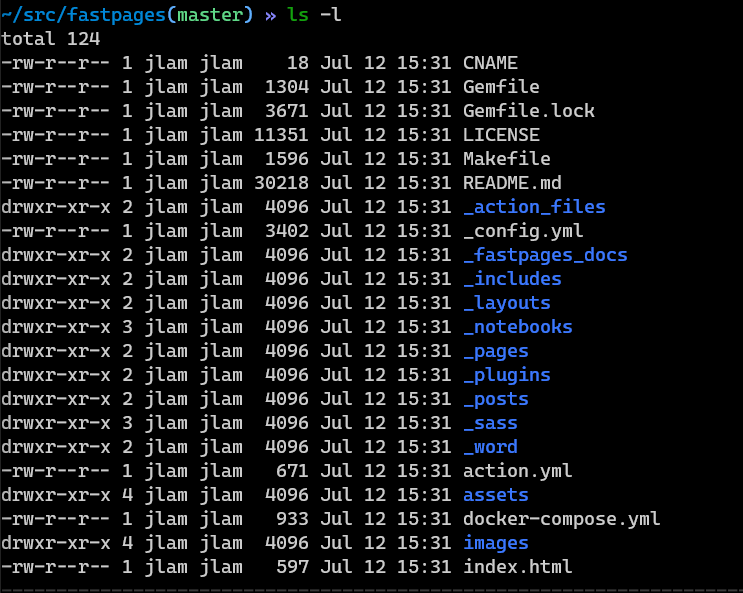

### Options via FrontMatter

The first cell in your Jupyter Notebook or markdown blog post contains front matter.  Front matter is metadata that can turn on/off options in your Notebook.  It is formatted like this:

```
# Title
> Awesome summary

- toc: true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]
```

**All of the above settings are enabled in this post, so you can see what they look like!**

- the summary field (preceeded by `>`) will be displayed under your title, and will also be used by social media to display as the description of your page.
- `toc`: setting this to `true` will automatically generate a table of contents
- `badges`: setting this to `true` will display Google Colab and GitHub links on your blog post.
- `comments`: setting this to `true` will enable comments.  See [these instructions](https://github.com/fastai/fastpages#enabling-comments) for more details.
- `author` this will display the authors names. 
- `categories` will allow your post to be categorized on a "Tags" page, where readers can browse your post by categories.


_Markdown front matter is formatted similarly to notebooks.  The differences between the two can be [viewed on the fastpages README](https://github.com/fastai/fastpages#front-matter-related-options)._

### Code Folding

put a `#collapse-hide` flag at the top of any cell if you want to **hide** that cell by default, but give the reader the option to show it:

In [1]:
#collapse-hide
import pandas as pd
import altair as alt

put a `#collapse-show` flag at the top of any cell if you want to **show** that cell by default, but give the reader the option to hide it:

In [2]:
#collapse-show
cars = 'https://vega.github.io/vega-datasets/data/cars.json'
movies = 'https://vega.github.io/vega-datasets/data/movies.json'
sp500 = 'https://vega.github.io/vega-datasets/data/sp500.csv'
stocks = 'https://vega.github.io/vega-datasets/data/stocks.csv'
flights = 'https://vega.github.io/vega-datasets/data/flights-5k.json'

If you want to completely hide cells (not just collapse them), [read these instructions](https://github.com/fastai/fastpages#hide-inputoutput-cells).

In [3]:
# hide
df = pd.read_json(movies) # load movies data
df.columns = [x.replace(' ', '_') for x in df.columns.values]
genres = df['Major_Genre'].unique() # get unique field values
genres = list(filter(lambda d: d is not None, genres)) # filter out None values
genres.sort() # sort alphabetically

### Interactive Charts With Altair

Interactive visualizations made with [Altair](https://altair-viz.github.io/) remain interactive!  

We leave this below cell unhidden so you can enjoy a preview of syntax highlighting in fastpages, which uses the [Dracula theme](https://draculatheme.com/).

In [4]:
# select a point for which to provide details-on-demand
label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart().mark_line().encode(
    alt.X('date:T'),
    alt.Y('price:Q', scale=alt.Scale(type='log')),
    alt.Color('symbol:N')
)

alt.layer(
    base, # base line chart
    
    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='date:T'
    ).transform_filter(label),
    
    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='price:Q'
    ).transform_filter(label),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='price:Q'
    ).transform_filter(label),
    
    data=stocks
).properties(
    width=500,
    height=400
)

alt.LayerChart(...)

### Data Tables

You can display tables per the usual way in your blog:

In [5]:
# display table with pandas
df[['Title', 'Worldwide_Gross', 
    'Production_Budget', 'IMDB_Rating']].head()

,Title,Worldwide_Gross,Production_Budget,IMDB_Rating
0,The Land Girls,146083.0,8000000.0,6.1
1,"First Love, Last Rites",10876.0,300000.0,6.9
2,I Married a Strange Person,203134.0,250000.0,6.8
3,Let's Talk About Sex,373615.0,300000.0,NaN
4,Slam,1087521.0,1000000.0,3.4


## Other Feautures

### GitHub Flavored Emojis

Typing `I give this post two :+1:!` will render this:

I give this post two :+1:!

### Images w/Captions

You can include markdown images with captions like this:

```
![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")
```


![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")

Of course, the caption is optional.

### Tweetcards

Typing `> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20` will render this:

> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20

### Youtube Videos

Typing `> youtube: https://youtu.be/XfoYk_Z5AkI` will render this:


> youtube: https://youtu.be/XfoYk_Z5AkI

### Boxes / Callouts 

Typing `> Warning: There will be no second warning!` will render this:


> Warning: There will be no second warning!



Typing `> Important: Pay attention! It's important.` will render this:

> Important: Pay attention! It's important.



Typing `> Tip: This is my tip.` will render this:

> Tip: This is my tip.



Typing `> Note: Take note of this.` will render this:

> Note: Take note of this.



Typing `> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.` will render in the docs:

> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.

## More Examples

This [tutorial](https://fastpages.fast.ai/jupyter/2020/02/20/test.html) contains more examples of what you can do with notebooks.  

## How fastpages Converts Notebooks to Blog Posts

fastpages uses [nbdev](https://nbdev.fast.ai/index.html) to power the conversion process of Jupyter Notebooks to blog posts.  When you save a notebook into the `/_notebooks` folder of your repository, GitHub Actions applies `nbdev` against those notebooks automatically.  The same process occurs when you save Word documents or markdown files into the `_word` or `_posts` directory, respectively.

We will discuss how GitHub Actions work in a follow up blog post.

## Resources & Next Steps

We highly encourage you to start blogging with `fastpages`!  Some resources that may be helpful:

- [fastpages repo](https://github.com/fastai/fastpages) - this is where you can go to create your own fastpages blog!
- Fastai forums - [nbdev & blogging category](https://forums.fast.ai/c/fastai-users/nbdev/).  You can ask questions about fastpages here, as well as suggest new features.
- [nbdev](https://github.com/fastai/nbdev): this project powers the conversion of Jupyter notebooks to blog posts.

If you end up writing a blog post using fastpages, please let us know on Twitter: [@jeremyphoward](https://twitter.com/jeremyphoward), [@HamelHusain](https://twitter.com/hamelhusain).